# MNIST Example : 이전 결과는 97.8%

- 데이터 로딩 및 확인 / 데이터 준비

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
raw_test = test_labels

print(train_images.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
print(train_images.shape)

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#from tensorflow.keras.utils import to_categorical
#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)
print(train_labels)

(60000, 28, 28)
(60000, 28, 28, 1)
[5 0 4 ... 5 6 8]


- 모델 정의

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

- 컴파일

In [3]:
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

- 모델 학습

In [4]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 14s 9ms/step - loss: 0.4238 - accuracy: 0.8652
Epoch 2/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0515 - accuracy: 0.9831
Epoch 3/5
938/938 [==============================] - 9s 9ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 4/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0249 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0189 - accuracy: 0.9943


- 성능평가

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0301 - accuracy: 0.9917
0.9916999936103821


In [6]:
import numpy as np
preds = model.predict(test_images)
print(preds.shape)
print(preds[:,0])

(10000, 10)
[8.3629197e-12 9.6745567e-10 3.2649857e-13 ... 8.8659958e-17 1.0706300e-07
 3.7402206e-08]


In [9]:
preds = np.argmax(preds, axis=-1)
preds

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [10]:
len(preds[preds != raw_test])

83

In [11]:
[i for i, x in enumerate(preds != raw_test) if x]

[62,
 247,
 321,
 445,
 448,
 449,
 582,
 646,
 659,
 882,
 947,
 1014,
 1039,
 1044,
 1226,
 1232,
 1247,
 1260,
 1299,
 1393,
 1549,
 1621,
 1709,
 1737,
 1878,
 1901,
 2035,
 2070,
 2130,
 2135,
 2182,
 2266,
 2293,
 2329,
 2488,
 2582,
 2597,
 2654,
 2939,
 2953,
 2995,
 3060,
 3073,
 3225,
 3422,
 3520,
 3762,
 3780,
 3796,
 3850,
 3906,
 3941,
 4078,
 4163,
 4176,
 4248,
 4369,
 4571,
 4699,
 4740,
 4761,
 5165,
 5937,
 5981,
 5997,
 6560,
 6571,
 6576,
 6597,
 6651,
 8059,
 8527,
 9015,
 9620,
 9634,
 9638,
 9642,
 9664,
 9701,
 9729,
 9770,
 9856,
 9904]

정답: 2
예측: 7


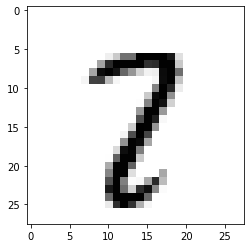

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
i=321
print('정답:', raw_test[i])
print('예측:', preds[i])
plt.imshow(test_images[i,:,:,0], cmap='binary');

정답: 6
예측: 0


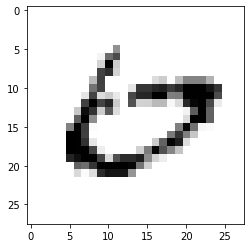

In [16]:
i=445
print('정답:', raw_test[i])
print('예측:', preds[i])
plt.imshow(test_images[i,:,:,0], cmap='binary');